In [1]:
import warnings

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import precision_score, confusion_matrix, recall_score, accuracy_score

from get_data import get_balanced_exoplanet_data

warnings.simplefilter("ignore")

## Test xgboost 



0.9992094861660079
1.0
0.9996039603960396


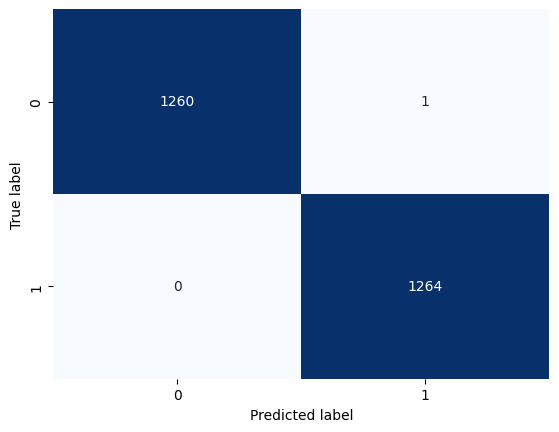

In [2]:
x_train, x_test, y_train, y_test = get_balanced_exoplanet_data()


# Parameters
rng_seed = 2023
depth = 5
boosting_rounds = 100

model = xgb.XGBClassifier(
    max_depth=depth,
    random_state=rng_seed,
    class_weight="balanced",
    n_estimators=boosting_rounds,
)
model.fit(x_train, y_train)
pred = model.predict(x_test)

# Confusion matrix
sns.heatmap(
    confusion_matrix(y_test, pred),
    annot=True,
    cmap="Blues",
    cbar=False,
    fmt=".0f",
)
plt.xlabel("Predicted label")
plt.ylabel("True label")

# Metrics
print(precision_score(y_test, pred))
print(recall_score(y_test, pred))
print(accuracy_score(y_test, pred))

## Xgboost grid search as func of depth and boosting rounds

In [3]:
"""# Parameters
depths = [10, 30, 50]
boost_vals = [10, 30, 50, 100, 200]
filename = "../results/figures/xgboost_gridsearch_depth_boost.png"

precisions = np.empty((len(depths), len(boost_vals)))
models = np.empty_like(precisions, dtype=xgb.XGBClassifier)
for i, depth in enumerate(depths):
    for j, boost in enumerate(boost_vals):
        model = xgb.XGBClassifier(
            max_depth=depth,
            random_state=rng_seed,
            class_weight="balanced",
            n_estimators=boost,
        )
        model.fit(x_train, y_train)
        pred = model.predict(x_test)
        models[i, j] = model
        precisions[i, j] = precision_score(y_test, pred)


sns.heatmap(
    precisions,
    annot=True,
    fmt=".3f",
    cmap="viridis",
    xticklabels=boost_vals,
    yticklabels=depths,
    cbar_kws={"label": "Test precision"},
)
plt.xlabel("No. boosting rounds")
plt.ylabel("Max tree depth")
plt.xticks(depths)

if filename:
    plt.savefig(filename)
plt.show(); """

Exception ignored on calling ctypes callback function: <bound method DataIter._next_wrapper of <xgboost.data.SingleBatchInternalIter object at 0x0000025C9810EB50>>
Traceback (most recent call last):
  File "c:\Users\lasse\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py", line 588, in _next_wrapper
    def _next_wrapper(self, this: None) -> int:  # pylint: disable=unused-argument

KeyboardInterrupt: 


: 